<a href="https://colab.research.google.com/github/SonyFebri/PCVK.2024-2025/blob/main/praktikum_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
from google.colab.patches import cv2_imshow

Mounted at /content/drive


Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


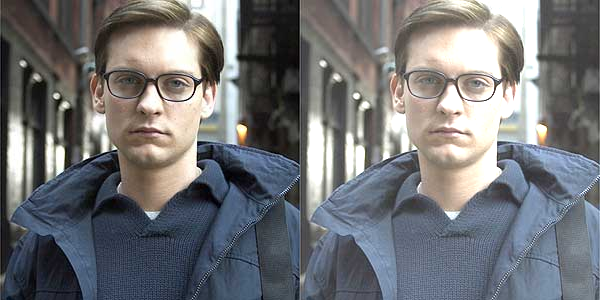

In [8]:
print ('Mengubah tingkat kecerahan citra')
print ('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print ('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/pparker.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
        for x in range(original.shape[1]):
            for c in range(original.shape[2]):
                brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

#cara simple tanpa loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat([original, brightness_image])
cv2_imshow(final_frame)

Inverse Citra
-------------


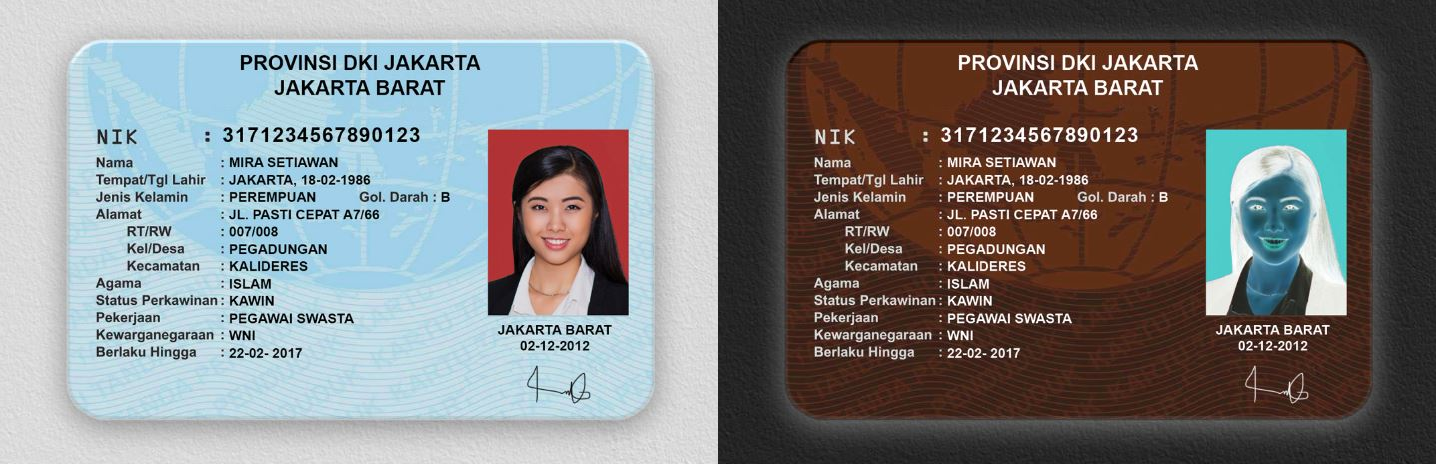

In [9]:
print ('Inverse Citra')
print ('-------------')
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

ktp = cv.imread('/content/drive/MyDrive/PCVK/ktp.jpeg')
inverse_image = np.zeros(ktp.shape, ktp.dtype)

for y in range(ktp.shape[0]):
    for x in range(ktp.shape[1]):
        for c in range(ktp.shape[2]):
            inverse_image[y,x,c] = 255 - ktp[y,x,c]

final_frame = cv.hconcat((ktp, inverse_image))
cv2_imshow(final_frame)

Transformasi Contrast
---------------------
Masukkan Tingkat kecerahan [-255 - 255]: 50
Masukkan Kontras [1.0 - 3.0]: 2


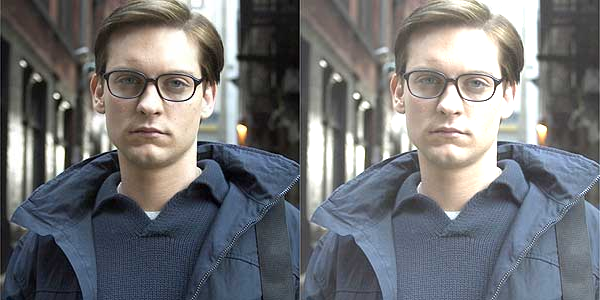

In [10]:
print ('Transformasi Contrast')
print ('---------------------')
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

try:
  brightness = int(input('Masukkan Tingkat kecerahan [-255 - 255]: '))
  contrast = int(input('Masukkan Kontras [1.0 - 3.0]: '))
except ValueError:
  print ('Error, not a number')

img = cv.imread('/content/drive/MyDrive/PCVK/pparker.jpg')
contrast_img = np.zeros(img.shape, img.dtype)

F = (259 * (contrast + 255)) / (255 *(259 - contrast))

for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        for c in range(img.shape[2]):
            contrast_img[y,x,c] = np.clip(F * (img[y,x,c]-128) + 128 + brightness, 0, 255)

final_frame = cv.hconcat((img, contrast_img))

cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra dengan transformasi logarithmic brighness
--------------------------------------------------------------------------
Masukkan nilai kecerahan: 50


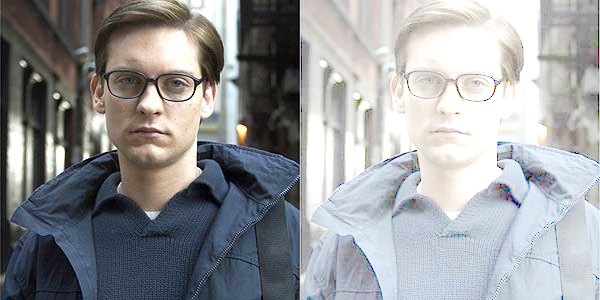

In [11]:
print ('Mengubah tingkat kecerahan citra dengan transformasi logarithmic brighness')
print ('--------------------------------------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print ('Error, not a number')

img = cv.imread('/content/drive/MyDrive/PCVK/pparker.jpg')
transform_log = np.zeros(img.shape, img.dtype)

c = 255 / np.log(1 + np.max(img))
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        for c in range(img.shape[2]):
            transform_log[y,x,c] = np.clip(brightness * np.log(1 + img[y,x,c]), 0, 255)

final_frame = cv.hconcat((img, transform_log))
cv2_imshow(final_frame)

Average


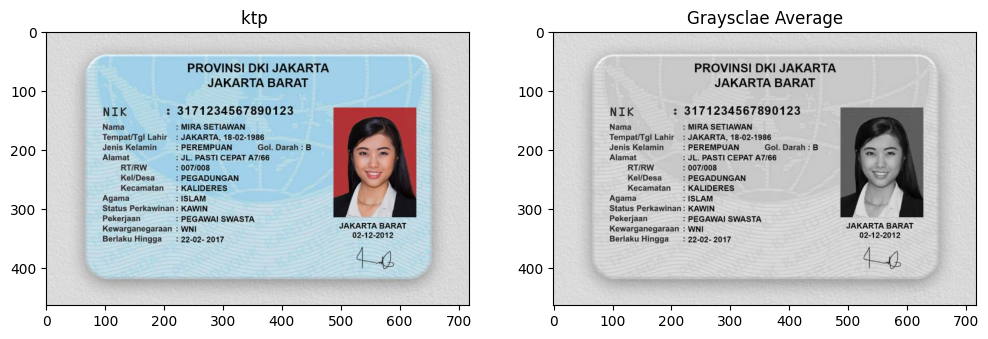

In [13]:
ktp = cv.imread('/content/drive/MyDrive/PCVK/ktp.jpeg')

import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

ktp_rgb = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)

B,G,R = cv.split(ktp)

graysclae_avg = np.mean(ktp, axis=2).astype(np.uint8)

averaging_image = np.stack([graysclae_avg] * 3, axis=-1)

averaging_image_rgb = cv.cvtColor(averaging_image, cv.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('ktp ')
plt.imshow(ktp_rgb)

plt.subplot(1, 2, 2)
plt.title('Graysclae Average')
print('Average')
plt.imshow(averaging_image_rgb)

Lightness


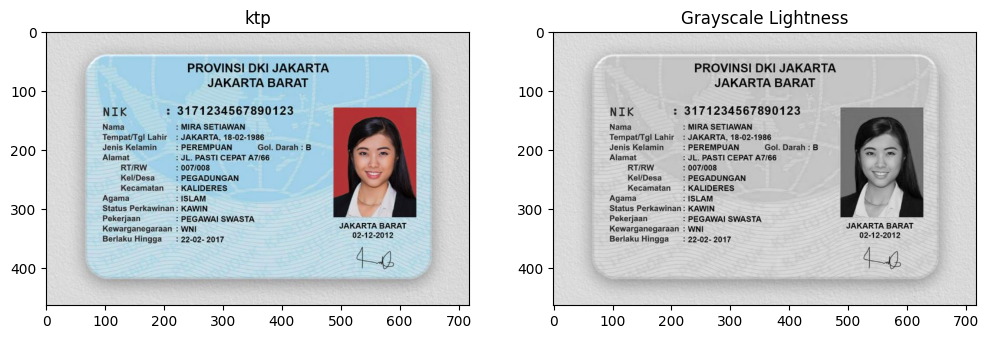

In [14]:
ktp = cv.imread('/content/drive/MyDrive/PCVK/ktp.jpeg')
ktp_rgb = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)
B,G,R = cv.split(ktp)

max_image = np.maximum(np.maximum(R, G), B)
min_image = np.minimum(np.minimum(R, G), B)

max_min_combined = np.array([max_image, min_image])

grayscale_lightness = np.mean(max_min_combined, axis=0).astype(np.uint8)
lightness_image = np.stack([grayscale_lightness] * 3, axis=-1)
lightness_image_rgb = cv.cvtColor(lightness_image, cv.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('ktp')
plt.imshow(ktp_rgb)

plt.subplot(1, 2, 2)
plt.title('Grayscale Lightness')
print('Lightness')
plt.imshow(lightness_image_rgb)

Luminance


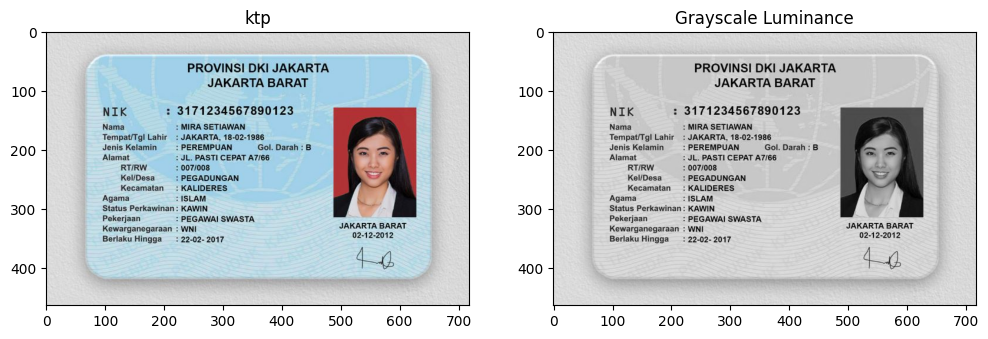

In [15]:
ktp = cv.imread('/content/drive/MyDrive/PCVK/ktp.jpeg')
ktp_rgb = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)

B, G, R = cv.split(ktp)

# Menghitung luminance
graysclae_luminance = (0.21 * R + 0.72 * G + 0.07 * B).astype(np.uint8)

luminance_image = np.stack([graysclae_luminance] * 3, axis=-1)

luminance_image_rgb = cv.cvtColor(luminance_image, cv.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('ktp')
plt.imshow(ktp_rgb)

plt.subplot(1, 2, 2)
plt.title('Grayscale Luminance')
plt.imshow(luminance_image_rgb)
print('Luminance')
plt.show()

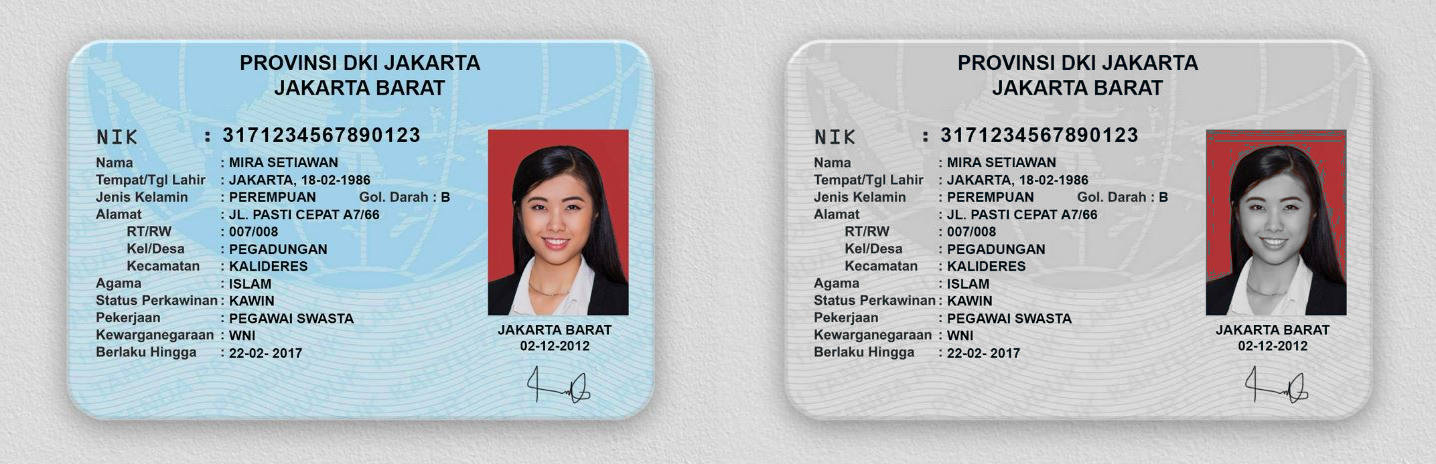

In [32]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
ktp = cv.imread('/content/drive/MyDrive/PCVK/ktp.jpeg')

# Membuat Array Kosong
ktp2 = np.zeros(ktp.shape, ktp.dtype)

# Iterasi Melalui Setiap Piksel
for y in range(ktp2.shape[0]):
  for x in range(ktp2.shape[1]):
    for c in range(ktp2.shape[2]):
      b,g,r = ktp[y,x]
      # Pengecekan Warna Piksel
      if r < 170 and g < 60 and b < 60:
        ktp2[y,x,c] = ktp[y,x,c]
      else:
        ktp2[y,x,c] = np.mean(ktp[y,x])

cv2_imshow(cv.hconcat((ktp, ktp2)))